<a href="https://colab.research.google.com/github/Fawzy-AI-Explorer/X-From-Scratch/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Librarires**

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.utils as utils
import tensorflow.keras.datasets.mnist as mnist



In [42]:

def plot_sample_images(images, labels, num_samples=25):
    """
    Plot a grid of sample images from the dataset along with their corresponding labels.

    Parameters:
        images (numpy.ndarray): An array of images to display.
        labels (numpy.ndarray): An array of corresponding labels for the images.
        num_samples (int): Number of samples to plot. Default is 25.
    """
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()



# **Load DataSet**

In [43]:
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# Load the entire MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Filter the dataset to include only digits 2 and 3
train_mask = np.isin(train_labels, [1,2])
test_mask = np.isin(test_labels, [1 , 2])

train_images = train_images[train_mask]
train_labels = train_labels[train_mask]
test_images = test_images[test_mask]
test_labels = test_labels[test_mask]



# **Some Info about Data**

In [44]:
len(train_images)

12700

**Training set: `12700` images.**

In [45]:
train_images.shape

(12700, 28, 28)

**Image Size: Each image in the MNIST dataset has a size of  `28x28`  pixels.**

In [46]:
train_images.shape

(12700, 28, 28)

In [47]:
# print(train_images[0])

**each pixel typically has a single intensity value ranging from 0 (black) to 255 (white) ---- > the images are grayscale..**

In [48]:
len(test_images)

2167

**Test set: `2167` images.**

In [49]:
test_images[0].shape

(28, 28)

In [50]:
test_images.shape

(2167, 28, 28)

# **plotting**

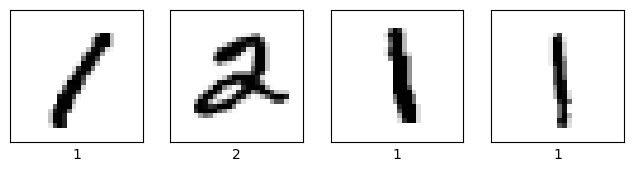

In [51]:
plot_sample_images(train_images, train_labels, num_samples=4)

# **Normalization**

---
---
---
**Convergence Speed: Normalization can help the convergence of optimization algorithms, such as gradient descent. By scaling the input data to a smaller range, the optimization process may converge faster, leading to quicker training times.**

In [52]:
# Normalize pixel values from 0 to 255 to 0 to 1
train_images = utils.normalize(train_images, axis=1)
test_images = utils.normalize(test_images, axis=1)

In [55]:
# train_images[0]

# **Flatten**

**Many neural network architectures, such as fully connected (dense) layers, require the input data to be in one-dimensional format. <br>
Flattening converts the multi-dimensional input data (e.g., images represented as 2D arrays) into a one-dimensional array**

In [78]:
# Assuming you have already reshaped the images
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Print the shapes of the flattened images
print("Shape of flattened train images:", train_images.shape)
print("Shape of flattened test images:", test_images.shape,"\n")

print("Shape of first flattened train images:", train_images[0].shape)
print("Shape of first flattened test images:", test_images[0].shape)





Shape of flattened train images: (12700, 784)
Shape of flattened test images: (2167, 784) 

Shape of first flattened train images: (784,)
Shape of first flattened test images: (784,)


In [79]:
train_images.shape

(12700, 784)

# **NN**

## **Activation function**

In [84]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))
#*******************************************************************************
z = np.array([[1,2]])
sigmoid(z)

array([[0.73105858, 0.88079708]])

In [85]:
def relu(Z):
    return np.maximum(0, Z)
#*******************************************************************************
z = np.array([[1,-2 , 0 , 100]])
relu(z)

array([[  1,   0,   0, 100]])

In [86]:
def sigmoid(Z):
    """
    Compute the sigmoid activation function.

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of the sigmoid function, same shape as Z
    """
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    """
    Compute the ReLU activation function.

    Arguments:
    Z -- numpy array of any shape

    Returns:
    A -- output of the ReLU function, same shape as Z
    """
    return np.maximum(0, Z)



## **Feed Forward Implementation**

Our NN will have a simple three-layer architecture. <br><br>Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image.<br><br>
First hidden layer $a^{[1]}$ will have 4 units with ReLU activation.<br><br>
Second hidden layer $a^{[2]}$ will have 2 units with ReLU activation.<br><br>
and finally our output layer $a^{[3]}$ will have 1 unit corresponding to the two digit classes with sigmoid activation.<br><br>

**Forward propagation**

$$Z^{[1]} = W^{[0]}.  X + b^{[0]}$$
$$a^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$<br><br>

$$Z^{[2]} = W^{[1]} .a^{[1]} + b^{[1]}$$
$$a^{[2]} = g_{\text{ReLU}}(Z^{[1]}))$$<br><br>

$$Z^{[3]} = W^{[2]} . a^{[2]} + b^{[2]}$$
$$a^{[3]} = g_{\text{sigmoid}}(Z^{[1]}))$$<br><br>

<!-- $$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$a^{[2]} = g_{\text{softmax}}(Z^{[2]})$$ -->



**shapes**

Forward prop
- $a^{[0]} $ : 12700 * 784
- $W^{[0]} $: 784 * 4
- $b^{[0]} $: 1 * 4
- $Z^{[1]} $: 12700 * 4 <br><br>

- $a^{[1]} $ : 12700 * 4
- $W^{[1]} $: 4 * 2
- $b^{[1]} $: 1 * 2
- $Z^{[2]} $: 12700 * 2<br><br>

- $a^{[2]} $ : 12700 * 2
- $W^{[2]} $: 2 * 1
- $b^{[2]} $: 1 * 1
- $Z^{[3]} $: 12700 * 1<br><br>







In [145]:
train_images.shape

(12700, 784)

In [146]:
input_layer0 = train_images   #(12700, 784)
nodes_layer0 = input_layer0.shape[1]   #784
nodes_layer1 = 4
nodes_layer2 = 2
nodes_layer3 = 1

w0 = np.random.rand ( nodes_layer0 , nodes_layer1 )
b0 = np.random.rand ( 1            , nodes_layer1 )

w1 = np.random.rand ( nodes_layer1 , nodes_layer2 )
b1 = np.random.rand ( 1            , nodes_layer2 )


w2 = np.random.rand ( nodes_layer2 , nodes_layer3 )
b2 = np.random.rand ( 1            , nodes_layer3 )



# w0 = np.full ( ( input_layer0.shape[1] + 1 , nodes_layer1 ) , 1)
# w1 = np.full ( ( nodes_layer1          + 1 , nodes_layer2 ) , 1)
# w2 = np.full ( ( nodes_layer2          + 1 , nodes_layer3 ) , 1)


print(f"input shape = {input_layer0.shape}")
print(f"nodes in layer 0 = {nodes_layer0} , w0 shape = {w0.shape} , b0 shape = {b0.shape}")
print(f"nodes in layer 1 = {nodes_layer1}   , w1 shape = {w1.shape}   , b1 shape = {b1.shape}")
print(f"nodes in layer 2 = {nodes_layer2}   , w2 shape = {w2.shape}   , b2 shape = {b2.shape}")
print(f"nodes in layer 3 = {nodes_layer3}")




input shape = (12700, 784)
nodes in layer 0 = 784 , w0 shape = (784, 4) , b0 shape = (1, 4)
nodes in layer 1 = 4   , w1 shape = (4, 2)   , b1 shape = (1, 2)
nodes in layer 2 = 2   , w2 shape = (2, 1)   , b2 shape = (1, 1)
nodes in layer 3 = 1


In [148]:
#compute nodes in layer 1 (a1 a2 a3 a4)
z1 =  b0 +np.dot(input_layer0 , w0)
  #  (1*4)+   (12700*784) * (784*4)  ---- > (12700*4)
a1 = relu (z1)
#-----------------------------------------------------------
#compute nodes in layer 2 (a1 a2 a3 )
z2 =  b1 +np.dot(a1 , w1)
#   (1*2)+   (12700*4) * (4*2)  ---- > (12700*2)
a2 = relu (z2)
#-----------------------------------------------------------
#compute nodes in layer 3 (a1)
z3 =  b2 +np.dot(a2 , w2)
#   (1*1)+   (12700*2) * (2*1)  ---- > (12700*1)
a3 = sigmoid (z3)
#-----------------------------------------------------------
print(f"{a1.shape} {a2.shape} {a3.shape}")

(12700, 4) (12700, 2) (12700, 1)


# **Backward propagation Implementation**